PRELIMINARY STEPS

Importing all the libraries

In [217]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import skewnorm
from scipy.stats import f_oneway
from scipy import stats 
from sklearn.cluster import KMeans

We download the fama-french dataset

In [218]:
famafrench = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.csv', skiprows = 3)
famafrench = famafrench.rename(columns={'Unnamed: 0': 'Date'})
famafrench = famafrench[famafrench['Date']>20091231]
famafrench

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
11707,20100104,1.69,0.79,1.13,-0.18,0.21,0.0
11708,20100105,0.31,-0.41,1.24,-0.20,0.19,0.0
11709,20100106,0.13,-0.13,0.57,-0.05,0.20,0.0
11710,20100107,0.40,0.25,0.98,-0.69,0.22,0.0
11711,20100108,0.33,0.32,0.01,0.22,-0.37,0.0
...,...,...,...,...,...,...,...
14723,20211227,1.22,-0.11,0.28,0.97,0.47,0.0
14724,20211228,-0.27,-0.41,0.80,0.83,0.21,0.0
14725,20211229,0.06,-0.01,0.15,0.67,-0.01,0.0
14726,20211230,-0.15,0.06,-0.38,-0.82,-0.41,0.0


Getting all the tickers in S&P500 through web scraping, as well as modifying some names in order to be readable by the yahoo finance API

In [219]:
tickers=[] 
resp = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
soup = bs.BeautifulSoup(resp.text)
table = soup.find("table", {"class":"wikitable sortable"}) #find table
for row in table.findAll("tr")[1:]: #for each table row except headers/titles
    ticker = row.findAll("td")[0].text[:-1] #in each row we want the table data, the first column, the name
    tickers.append(ticker)

modified_tickers=[] 
for x in tickers:
    x=x.replace('.', '-') 
    modified_tickers.append(x)


OLS REGRESSION

Getting the data for each stock and perform the OLS regression within the loop. For some stocks the start date is different from 2010-01-01 as they were listed at a later date; in these cases we perform the regression only on the dates available by filtering the fama-french dataset getting the last n observations, to match the datasets. Finally, we store all the values obtained in lists

In [220]:
alpha = []
beta1=[]
beta2=[]
beta3=[]
beta4=[]
beta5=[]

t_alpha=[]
t_beta1=[]
t_beta2=[]
t_beta3=[]
t_beta4=[]
t_beta5=[]

r_sqrd=[]

excluded =[]

start = dt.datetime(2010,1,1)
end = dt.datetime(2021,12,31)

for i in modified_tickers:
    try:
        df = web.DataReader(i, "yahoo", start, end)
    except:
        excluded.append(i)
        print('EXCLUDING:' + str(i))
        continue
        
    df['log_ret'] = (np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1)))*100
    df['log_ret']=df['log_ret'].fillna(0)
    ss = len(np.array(df['log_ret']))
    df['log_ret']=np.array(df['log_ret'])-np.array(famafrench['RF'][-ss:])

    X = famafrench[['Mkt-RF', 'SMB','HML','RMW', 'CMA' ]][-ss:]
    X = sm.add_constant(X)

    y = np.array(df['log_ret'])

    est = sm.OLS(y, X).fit()

    alpha.append(est.params[0])
    beta1.append(est.params[1])
    beta2.append(est.params[2])
    beta3.append(est.params[3])
    beta4.append(est.params[4])
    beta5.append(est.params[5])

    t_alpha.append(est.tvalues[0])
    t_beta1.append(est.tvalues[1])
    t_beta2.append(est.tvalues[2])
    t_beta3.append(est.tvalues[3])
    t_beta4.append(est.tvalues[4])
    t_beta5.append(est.tvalues[5])

    r_sqrd.append(est.rsquared)

    print(i)

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVI
ADM
ADBE
ADP
AAP
AES
AFL
A
AIG
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
APA
AAPL
AMAT
APTV
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
BKR
BLL
BAC
BBWI
BAX
BDX
BRK-B
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF-B
CHRW
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CERN
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
EXCLUDING:CEG
COO
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ENPH
ETR
EOG
EPAM
EFX
EQIX
EQR
ESS
EL
ETSY
RE
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FAST
FRT
FDX
FITB
FRC
FE
FIS
FISV
FLT
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GRMN
IT
GE
GNRC
GD
GIS
GPC
GILD
GL
GPN
GM
GS
GWW
HAL
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL


There are some tickers for which we can't retrieve the data so that we decided to exclude them

In [221]:
for i in excluded:
    modified_tickers.remove(i)

We create the dataframe containing all the relevant parameters and relative tickers

In [222]:
OLS = pd.DataFrame()

OLS['Ticker'] = modified_tickers
OLS['Alpha']=alpha
OLS['Beta1']=beta1
OLS['Beta2']=beta2
OLS['Beta3']=beta3
OLS['Beta4']=beta4
OLS['Beta5']=beta5
OLS['T_alpha']=t_alpha
OLS['T_beta1']=t_beta1
OLS['T_beta2']=t_beta2
OLS['T_beta3']=t_beta3
OLS['T_beta4']=t_beta4
OLS['T_beta5']=t_beta5
OLS['R-squared']=r_sqrd

OLS

,Ticker,Alpha,Beta1,Beta2,Beta3,Beta4,Beta5,T_alpha,T_beta1,T_beta2,T_beta3,T_beta4,T_beta5,R-squared
0,MMM,-0.025972,0.922246,0.001201,0.108525,0.471795,0.431968,-1.582280,56.951802,0.040611,3.791722,10.996040,7.266977,0.558266
1,AOS,0.021716,0.976488,0.469290,0.029587,0.343371,0.202386,0.949164,43.263173,11.380519,0.741658,5.741662,2.442710,0.463359
2,ABT,0.006013,0.878301,-0.364557,-0.302177,0.028632,0.265999,0.334378,49.507539,-11.247687,-9.636868,0.609127,4.084598,0.465750
3,ABBV,0.014744,0.876466,-0.092346,-0.184029,-0.017704,0.078222,0.470200,28.341662,-1.676402,-3.527450,-0.216862,0.713436,0.279260
4,ABMD,0.061128,0.980350,0.447073,-0.577654,-0.586890,-0.197632,1.287320,20.927061,5.223666,-6.976560,-4.728316,-1.149279,0.203093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,YUM,0.005388,0.882305,-0.041083,0.056338,0.394075,-0.004401,0.240311,39.886509,-1.016579,1.440973,6.723694,-0.054203,0.373858
500,ZBRA,0.022588,1.172781,0.426599,-0.260019,0.145308,-0.019977,0.718883,37.833054,7.532593,-4.745755,1.769156,-0.175562,0.383062
501,ZBH,-0.025879,0.868765,0.189590,0.183557,0.129501,-0.250416,-1.114835,37.935332,4.531345,4.534811,2.134207,-2.978826,0.393998
502,ZION,0.020701,0.988328,0.305267,1.580878,-0.696192,-0.625354,0.892600,43.197029,7.303026,39.092854,-11.484277,-7.445943,0.666762


Descriptive statistics

Looking at the t-statistics especially, we can see that Beta1 is definitely siginificant in the regression, and so is Beta3, Beta4 and Beta5. Beta2 is lagging a bit behind, with an avergae value of t-statistics of 1.86. The Alpha is not significant in general and the R-squared coefficient is 0.43 meaning there is still a lot of room for improvement

In [223]:
for i in OLS.columns[1:]:
    data = OLS[i]
    
    print(pd.DataFrame(data.describe()), '\n', '\n')

            Alpha
count  504.000000
mean    -0.001899
std      0.034734
min     -0.139700
25%     -0.017884
50%     -0.002531
75%      0.014066
max      0.340576 
 

            Beta1
count  504.000000
mean     1.003277
std      0.212549
min      0.421892
25%      0.857630
50%      1.004086
75%      1.150252
max      1.656113 
 

            Beta2
count  504.000000
mean     0.139407
std      0.313385
min     -1.066326
25%     -0.106308
50%      0.120606
75%      0.333473
max      1.455868 
 

            Beta3
count  504.000000
mean     0.186255
std      0.505152
min     -0.954439
25%     -0.160147
50%      0.107366
75%      0.434443
max      1.790144 
 

            Beta4
count  504.000000
mean     0.105171
std      0.361981
min     -2.003718
25%     -0.099193
50%      0.161806
75%      0.366571
max      1.045844 
 

            Beta5
count  504.000000
mean    -0.014515
std      0.444915
min     -1.579455
25%     -0.264672
50%      0.028685
75%      0.279539
max      1.437749 
 

    

for each parameter we compute the non parametric densities by plotting the histogram, kernel density funtion and a normal distribution with fitted mean, standard deviation, skewness and kurtosis. Finally, we report these values under each table

C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


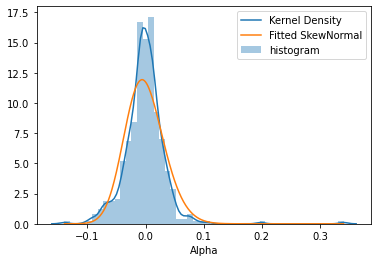

μ = -0.0018
σ = 0.03473
ξ = 2.01139
κ = 20.8244




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


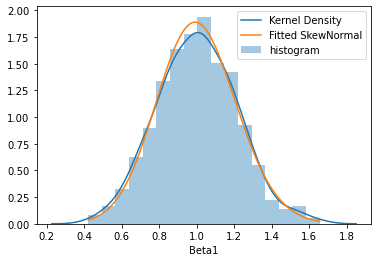

μ = 1.00327
σ = 0.21254
ξ = 0.11473
κ = 0.00210




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


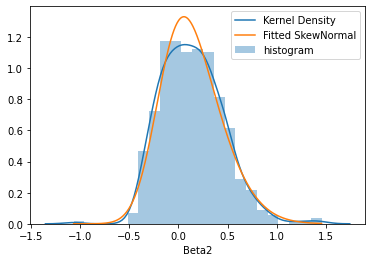

μ = 0.13940
σ = 0.31338
ξ = 0.51641
κ = 0.96027




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


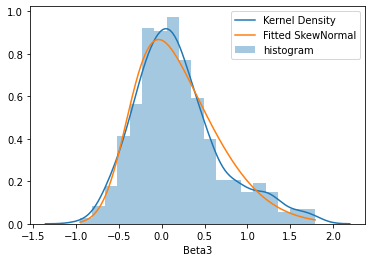

μ = 0.18625
σ = 0.50515
ξ = 0.82985
κ = 0.63615




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


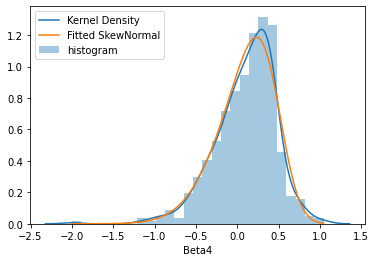

μ = 0.10517
σ = 0.36198
ξ = -0.9209
κ = 2.49004




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


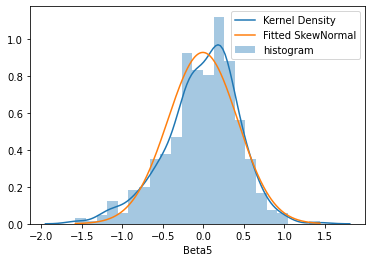

μ = -0.0145
σ = 0.44491
ξ = -0.5156
κ = 0.62682




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


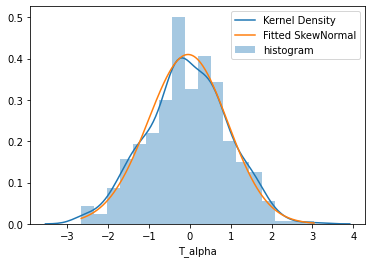

μ = -0.0703
σ = 0.97729
ξ = -0.0676
κ = -0.1633




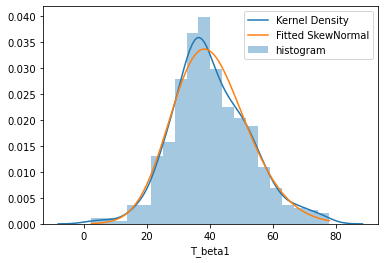

μ = 40.4636
σ = 12.1626
ξ = 0.32488
κ = 0.41495




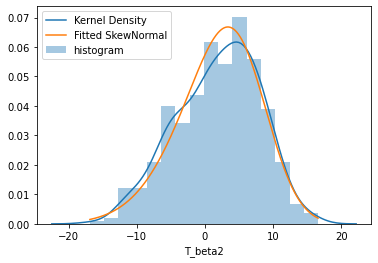

μ = 1.85441
σ = 6.09841
ξ = -0.3177
κ = -0.3878




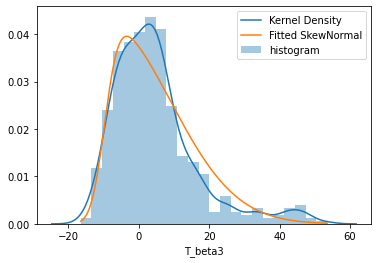

μ = 4.56941
σ = 12.0607
ξ = 1.50040
κ = 2.79984




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


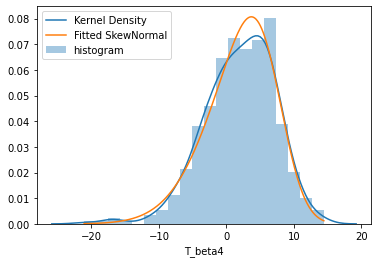

μ = 1.95197
σ = 5.22879
ξ = -0.6462
κ = 1.05929




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


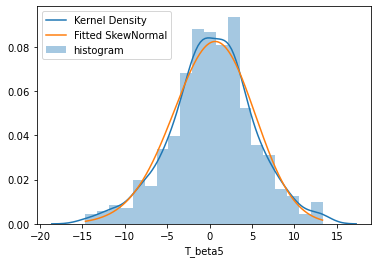

μ = 0.27815
σ = 4.88467
ξ = -0.1508
κ = 0.37021




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


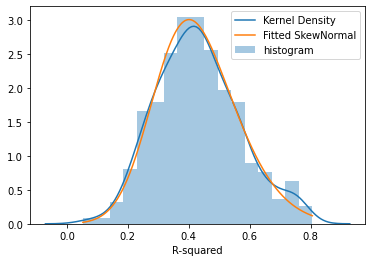

μ = 0.43018
σ = 0.13710
ξ = 0.32355
κ = -0.0779




In [224]:
for i in OLS.columns[1:14]:
    data = OLS[i]
    
    mu = str(data.mean())
    sd = str(data.std())
    skew = str(data.skew())
    kurt = str(data.kurt())
    
    params = skewnorm.fit(data, 10, loc=80, scale=40)
    
    ax = sns.distplot(data, kde_kws={'label':'Kernel Density'}, label='histogram')

    # draw the pdf of the fitted skewnorm
    x = np.linspace(data.min(), data.max(), 500)
    ax.plot(x, skewnorm.pdf(x, *params), label='Fitted SkewNormal')
    plt.legend()
    plt.show()
    
    
    print('μ = ' + mu[0:7])
    print('σ = ' + sd[0:7])
    print('ξ = ' + skew[0:7])
    print('κ = ' + kurt[0:7])
    print('\n')
    

GICS CONSIDERATION

Through web scraping we retrieve the GICS code for each stock as well as performing some data cleaning

In [226]:
GICS=[] 
resp = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
soup = bs.BeautifulSoup(resp.text)
table = soup.find("table", {"class":"wikitable sortable"}) #find table
for row in table.findAll("tr")[1:]:
    if row.findAll("td")[0].text[:-1] not in excluded:
        GICS.append(row.findAll("td")[3].text[:])
    else:
        continue

for i in range(len(GICS)):
    if GICS[i] == 'Communication Services\n':
        GICS[i] = 'Communication Services'

We add the column of GICS in the OLS framework and we group by sector, we can see that the  composition is heterogenous as some sectors are more represented, such as IT with 74 stocks, whereas others are less present. Notably Energy has only 21 firms within it

In [227]:
OLS['GICS'] = GICS
print(OLS.groupby(GICS).count())

                        Ticker  Alpha  Beta1  Beta2  Beta3  Beta4  Beta5  \
Communication Services      27     27     27     27     27     27     27   
Consumer Discretionary      60     60     60     60     60     60     60   
Consumer Staples            32     32     32     32     32     32     32   
Energy                      21     21     21     21     21     21     21   
Financials                  67     67     67     67     67     67     67   
Health Care                 64     64     64     64     64     64     64   
Industrials                 74     74     74     74     74     74     74   
Information Technology      74     74     74     74     74     74     74   
Materials                   28     28     28     28     28     28     28   
Real Estate                 29     29     29     29     29     29     29   
Utilities                   28     28     28     28     28     28     28   

                        T_alpha  T_beta1  T_beta2  T_beta3  T_beta4  T_beta5  \
Communi

Just to have a reference point we compute for each GICS the standard deviation from the mean of the means for each parameter. This gives an intuitive measure of how much the sectors are distant with each other in terms of means of parameters

In [229]:
print(OLS.groupby(GICS).mean().std()[0:6].sum())

1.2826931966613522


To make a more robust test, for each parameter, meaning alpha and betas, we want to compute the ANOVA test to check wheter their means are all the same across sectors. Furthermore, we plot the boxpolts for each parameter according to the sector to have a visual representation.

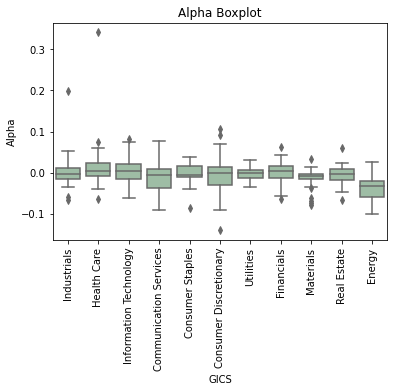

P-value of all having same Alpha is 1.6520276398417195e-06 
 
 
 



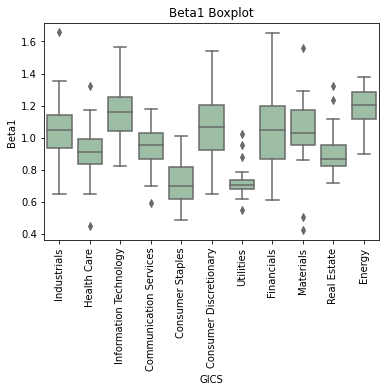

P-value of all having same Beta1 is 1.6844756771949064e-47 
 
 
 



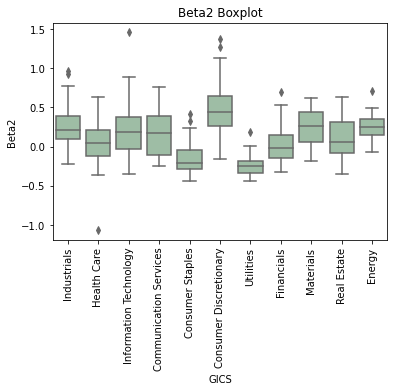

P-value of all having same Beta2 is 2.1918540204082238e-36 
 
 
 



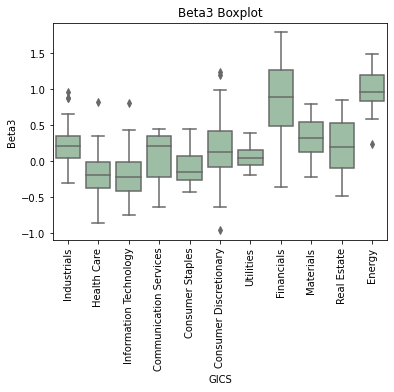

P-value of all having same Beta3 is 2.680773763999377e-73 
 
 
 



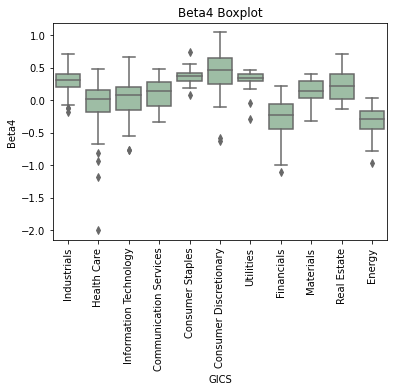

P-value of all having same Beta4 is 3.0812276679010456e-56 
 
 
 



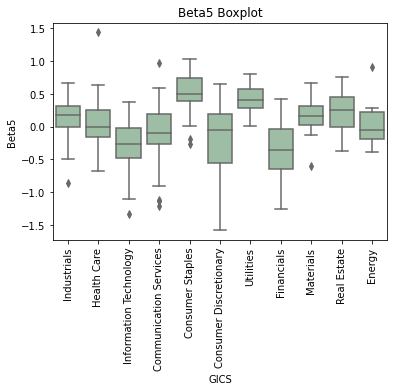

P-value of all having same Beta5 is 3.7505595415615156e-39 
 
 
 



In [230]:
sampleCOM = OLS[OLS['GICS']=='Communication Services']
sampleCD = OLS[OLS['GICS']=='Consumer Discretionary']
sampleCS = OLS[OLS['GICS']=='Consumer Staples']
sampleEN = OLS[OLS['GICS']=='Energy']
sampleFI = OLS[OLS['GICS']=='Financials']
sampleHC = OLS[OLS['GICS']=='Health Care']
sampleIN = OLS[OLS['GICS']=='Industrials']
sampleIT = OLS[OLS['GICS']=='Information Technology']
sampleMA = OLS[OLS['GICS']=='Materials']
sampleRE = OLS[OLS['GICS']=='Real Estate']
sampleUT = OLS[OLS['GICS']=='Utilities']

for i in OLS.columns[1:7]:
    ax = sns.boxplot(x='GICS', y=i, data=OLS, color='#99c2a2')
    plt.title(i + ' Boxplot')
    plt.xticks(rotation=90)
    plt.show()
    
    fvalue, pvalue = f_oneway(sampleCOM[i], sampleCD[i], sampleCS[i], sampleEN[i], sampleFI[i], sampleHC[i], sampleIN[i],
                                   sampleIT[i], sampleMA[i], sampleRE[i], sampleUT[i])
    print('P-value of all having same ' + i +' is ' + str(pvalue), '\n', '\n','\n','\n')
  
    

As we can see the H0 is rejeceted in all cases at the significance level of 0.01. So, we can conclude that the means of the parameters jointly are statistically different. To understand better how this relationship hold we perform the t-test pairwise, i.e we check for difference in mean for every parameter for every pair of sector (for example Energy VS Utility). This analysis will let us understand better whether sector is really relevant for the regression

To start, we create a list containing all the possible pairs between sectors. Given that the sectors are 11 and we don't consider the order, the number of pair combination should be equal to 11!/(9! * 2!) = 55. We perform a manual check to assess the relaiabilty of our code

In [231]:
res = [(a, b) for idx, a in enumerate(OLS['GICS'].unique()) for b in OLS['GICS'].unique()[idx + 1:]]
len(res)

55

We perform the t-test for each pair and each parameter and we store the values

In [232]:
pairs = []
alpha_p=[]
beta1_p=[]
beta2_p=[]
beta3_p=[]
beta4_p=[]
beta5_p=[]


for i in range(0,len(res)):
    Sector1 = res[i][0]
    Sector2 = res[i][1]
    
    for k in OLS.columns[1:7]:

        SS1 = OLS[OLS['GICS']==Sector1][k]
        SS2 = OLS[OLS['GICS']==Sector2][k]

        tvalue, pvalue = stats.ttest_ind(SS1, SS2)
        
        if k == 'Alpha':
            alpha_p.append(pvalue)
        elif k == 'Beta1':
            beta1_p.append(pvalue)
        elif k == 'Beta2':
            beta2_p.append(pvalue)
        elif k == 'Beta3':
            beta3_p.append(pvalue)
        elif k == 'Beta4':
            beta4_p.append(pvalue)
        elif k == 'Beta5':
            beta5_p.append(pvalue)
            
    pairs.append(Sector1 + ' VS ' + Sector2)

We create a dataset containing all the p-values for parameter and pair to have a clearer overview

In [233]:
P_values = pd.DataFrame()
P_values['Pair'] = pairs
P_values['Alpha_pv'] = alpha_p
P_values['Beta1_pv'] = beta1_p
P_values['Beta2_pv'] = beta2_p
P_values['Beta3_pv'] = beta3_p
P_values['Beta4_pv'] = beta4_p
P_values['Beta5_pv'] = beta5_p

P_values.head(5)

,Pair,Alpha_pv,Beta1_pv,Beta2_pv,Beta3_pv,Beta4_pv,Beta5_pv
0,Industrials VS Health Care,0.080074,5.383517e-07,8.552815e-06,4.100270e-15,1.330248e-10,4.555857e-02
1,Industrials VS Information Technology,0.341917,1.669094e-05,2.116306e-01,1.632505e-16,1.984116e-10,1.370225e-13
2,Industrials VS Communication Services,0.100909,8.192054e-03,1.890262e-01,5.265560e-03,4.146954e-05,1.062784e-03
3,Industrials VS Consumer Staples,0.751509,5.922534e-17,4.711837e-12,1.753958e-07,2.189635e-02,3.010766e-08
4,Industrials VS Consumer Discretionary,0.576709,4.773505e-01,1.396455e-04,2.106184e-01,1.409171e-03,9.769458e-07


Finally, we count the number of p-values lower than 0.05 as to check whether the average of parameters are significantly different

In [234]:
for i in P_values.columns[1:]:
    data = P_values[P_values[i] < 0.05]
    print('Pairs showing statistically different ' + i[0:-3] + ' are ' + str(data.count()[0]) + ' over 55')
    
acc = (P_values[['Alpha_pv', 'Beta1_pv', 'Beta2_pv', 'Beta3_pv', 'Beta4_pv', 'Beta5_pv']]<0.05).sum().sum()/(len(P_values)*6)
print('\n''Percentage number of significantly different average parameters is ' + str(acc))

Pairs showing statistically different Alpha are 18 over 55
Pairs showing statistically different Beta1 are 43 over 55
Pairs showing statistically different Beta2 are 41 over 55
Pairs showing statistically different Beta3 are 40 over 55
Pairs showing statistically different Beta4 are 44 over 55
Pairs showing statistically different Beta5 are 39 over 55

Percentage number of siginificantly different average parameters is 0.6818181818181818


CLUSTERING

The objective of clustering is to group our dataset following unsupervised rules that will increase the distance between groups. This means that each group, theoretically, will be as distant as possible from the others and this should help us find relevant features and rules to better cathegorize stocks

We have decided to use the k-means algorithm, which is one of the easiest and requires only one parameter being the number of clusters. To find the optimal hyperparameter we use the so-called elbow method, trying to identify where the slope of Within-Cluster Sum of Square decreases significantly in magnitude, which is the kink point in the graph, being around K=5

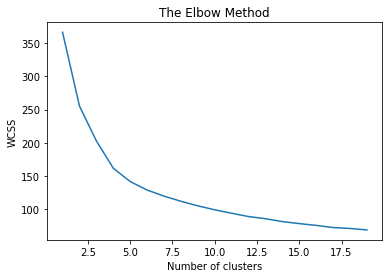

In [235]:
X = OLS[['Alpha','Beta1','Beta2','Beta3','Beta4','Beta5']]

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 420)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We fit the K-means model with cluster number = 5 to the data and we then create the column in OLS dataframe

In [236]:
km = KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels = km.labels_

OLS['K-Mean']=labels
OLS

,Ticker,Alpha,Beta1,Beta2,Beta3,Beta4,Beta5,T_alpha,T_beta1,T_beta2,T_beta3,T_beta4,T_beta5,R-squared,GICS,K-Mean
0,MMM,-0.025972,0.922246,0.001201,0.108525,0.471795,0.431968,-1.582280,56.951802,0.040611,3.791722,10.996040,7.266977,0.558266,Industrials,4
1,AOS,0.021716,0.976488,0.469290,0.029587,0.343371,0.202386,0.949164,43.263173,11.380519,0.741658,5.741662,2.442710,0.463359,Industrials,0
2,ABT,0.006013,0.878301,-0.364557,-0.302177,0.028632,0.265999,0.334378,49.507539,-11.247687,-9.636868,0.609127,4.084598,0.465750,Health Care,4
3,ABBV,0.014744,0.876466,-0.092346,-0.184029,-0.017704,0.078222,0.470200,28.341662,-1.676402,-3.527450,-0.216862,0.713436,0.279260,Health Care,4
4,ABMD,0.061128,0.980350,0.447073,-0.577654,-0.586890,-0.197632,1.287320,20.927061,5.223666,-6.976560,-4.728316,-1.149279,0.203093,Health Care,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,YUM,0.005388,0.882305,-0.041083,0.056338,0.394075,-0.004401,0.240311,39.886509,-1.016579,1.440973,6.723694,-0.054203,0.373858,Consumer Discretionary,0
500,ZBRA,0.022588,1.172781,0.426599,-0.260019,0.145308,-0.019977,0.718883,37.833054,7.532593,-4.745755,1.769156,-0.175562,0.383062,Information Technology,3
501,ZBH,-0.025879,0.868765,0.189590,0.183557,0.129501,-0.250416,-1.114835,37.935332,4.531345,4.534811,2.134207,-2.978826,0.393998,Health Care,0
502,ZION,0.020701,0.988328,0.305267,1.580878,-0.696192,-0.625354,0.892600,43.197029,7.303026,39.092854,-11.484277,-7.445943,0.666762,Financials,2


We compute the difference in Group distance computed using K-mean method and GICS cathegorization. As the difference is strictly positive we can assess that the clustering has indeed led to a better distinction between groups, even if the number of neighborhoods were less than the GICS, 5 VS 11

In [237]:
(OLS.groupby('K-Mean').mean().std()[0:6]-OLS.groupby('GICS').mean().std()[0:6]).sum()

0.5279095218808848

If we were to increase the cluster numbers to 11 to match the GICS, we would have benefitted from a litlle improvement in the model

In [238]:
km = KMeans(n_clusters=11)
km.fit(X)
km.predict(X)
labels = km.labels_

OLS['K-Mean']=labels
print((OLS.groupby('K-Mean').mean().std()[0:6]-OLS.groupby('GICS').mean().std()[0:6]).sum())

0.5671312514681243


ALPHAS

We extract the stocks with higher and lower Alphas

In [241]:
top5_alphas=OLS.nlargest(5,columns='Alpha')
bottom5_alphas=OLS.nsmallest(5,columns='Alpha')

print(top5_alphas)
print(bottom5_alphas)

    Ticker     Alpha     Beta1     Beta2     Beta3     Beta4     Beta5  \
318   MRNA  0.340576  0.450019 -0.167783 -0.683476 -2.003718  1.437749   
89    CARR  0.197963  0.723442  0.126799  0.443137 -0.056425 -0.204104   
442   TSLA  0.106532  1.219930  0.539956 -0.632921 -0.627454 -0.844436   
155    DPZ  0.091336  0.724768  0.286984 -0.448153  0.120718 -0.000109   
363   PAYC  0.082802  1.328406  0.446687 -0.221791 -0.433331 -1.325183   

      T_alpha    T_beta1   T_beta2   T_beta3   T_beta4   T_beta5  R-squared  \
318  1.912541   3.461523 -0.628693 -3.001089 -5.166120  2.835090   0.083362   
89   1.559648   7.197464  0.728613  3.125676 -0.235172 -0.658777   0.176118   
442  1.844730  21.350780  5.189032 -6.302887 -4.148513 -4.067306   0.227201   
155  3.038461  24.439391  5.296859 -8.549960  1.536337 -0.000999   0.211536   
363  1.628686  27.648104  5.209732 -2.762643 -3.412806 -7.822352   0.390248   

                       GICS  K-Mean  
318             Health Care       8  
89  

We can see that the high alpha stocks are Moderna, Carrier, Tesla, Domino's Pizza and Paycom. These stocks are extremely different so that no clear relation can be drawn. The worst alpha stocks for the period are instead Under Armor, APA corporation, Norwegian cruise line, FOX corporation and Lumen. Even in this case no clear relatioship can be drawn
############################################################################################################

MONTHLY ANALYSIS


OLS regression

In [242]:
monthly_alpha = []
monthly_beta1=[]
monthly_beta2=[]
monthly_beta3=[]
monthly_beta4=[]
monthly_beta5=[]

monthly_t_alpha=[]
monthly_t_beta1=[]
monthly_t_beta2=[]
monthly_t_beta3=[]
monthly_t_beta4=[]
monthly_t_beta5=[]

monthly_r_sqrd=[]

monthly_excluded =[]

start = dt.datetime(2010,1,1)
end = dt.datetime(2021,12,31)

for i in modified_tickers:
    try:
        df = web.DataReader(i, "yahoo", start, end)
    except:
        monthly_excluded.append(i)
        print('EXCLUDING:' + str(i))
        continue
        
    df['log_ret'] = (np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1)))*100
    df['log_ret']=df['log_ret'].fillna(0)
    ss = len(np.array(df['log_ret']))
    df['log_ret']=np.array(df['log_ret'])-np.array(famafrench['RF'][-ss:])
    
    df = df.reset_index()
    df['month'] = df['Date'].astype(str).str[:7]
    monthly_total = df.groupby('month').sum()['log_ret']
    ms = len(np.array(monthly_total))
    
    monthlyFF = famafrench[-ss:]
    monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]
    mff = monthlyFF.groupby('month').sum()

    X = mff[['Mkt-RF', 'SMB','HML','RMW', 'CMA' ]][-ms:]
    X = sm.add_constant(X)

    y = np.array(monthly_total)

    est = sm.OLS(y, X).fit()

    monthly_alpha.append(est.params[0])
    monthly_beta1.append(est.params[1])
    monthly_beta2.append(est.params[2])
    monthly_beta3.append(est.params[3])
    monthly_beta4.append(est.params[4])
    monthly_beta5.append(est.params[5])

    monthly_t_alpha.append(est.tvalues[0])
    monthly_t_beta1.append(est.tvalues[1])
    monthly_t_beta2.append(est.tvalues[2])
    monthly_t_beta3.append(est.tvalues[3])
    monthly_t_beta4.append(est.tvalues[4])
    monthly_t_beta5.append(est.tvalues[5])

    monthly_r_sqrd.append(est.rsquared)

    print(i)

<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MMM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AOS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ABT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ABBV


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ABMD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ACN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ATVI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ADM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ADBE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ADP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AAP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AES


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AFL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


A


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AIG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


APD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AKAM
ALK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]
<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ALB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ARE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ALGN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ALLE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LNT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ALL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GOOGL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GOOG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AMZN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AMCR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AMD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AEE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AAL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AEP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AXP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AMT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AWK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AMP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ABC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AME


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AMGN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


APH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ADI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ANSS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ANTM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AON


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


APA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AAPL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AMAT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


APTV


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ANET


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AJG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AIZ


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


T


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ATO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ADSK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AZO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AVB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AVY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BKR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BLL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BAC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BBWI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BAX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BDX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BRK-B


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BBY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BIO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TECH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BIIB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BLK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BKNG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BWA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BXP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BSX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BMY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


AVGO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BRO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BF-B


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CHRW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CDNS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CZR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CPB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


COF


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CAH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


KMX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CCL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CARR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CTLT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CAT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CBOE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CBRE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CDW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CNC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CNP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CDAY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CERN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CF


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CRL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SCHW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CHTR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CVX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CMG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CHD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CINF


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CTAS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CSCO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


C


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CFG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CTXS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CLX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CME


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CMS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


KO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CTSH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CMCSA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CMA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CAG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


COP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ED


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


STZ


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


COO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CPRT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GLW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CTVA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


COST


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CTRA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CCI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CSX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CMI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CVS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DHI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DHR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DRI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DVA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DAL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


XRAY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DVN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DXCM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FANG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DLR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DFS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DISCA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DISCK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DISH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DLTR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


D


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DPZ


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DOV


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DOW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DTE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DUK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DRE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DXC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EMN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ETN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EBAY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ECL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EIX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EMR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ENPH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ETR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EOG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EPAM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EFX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EQIX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EQR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ESS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ETSY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


RE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EVRG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ES


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EXC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EXPE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EXPD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


EXR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


XOM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FFIV


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FDS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FAST


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FRT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FDX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FITB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FRC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FIS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FISV


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FLT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FMC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


F


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FTNT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FTV


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FBHS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FOXA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FOX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


BEN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FCX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GRMN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


IT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GNRC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GIS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GPC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GILD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GPN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


GWW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HAL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HIG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HAS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HCA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PEAK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HSIC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HSY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HES


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HPE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HLT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HOLX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HON


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HRL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HST


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HWM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HPQ


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HUM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HBAN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


HII


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


IEX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


IDXX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


INFO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ITW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ILMN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


INCY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


IR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


INTC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ICE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


IBM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


IP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


IPG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


IFF


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


INTU


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ISRG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


IVZ


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


IPGP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


IQV


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


IRM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


JKHY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


J


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


JBHT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SJM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


JNJ


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


JCI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


JPM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


JNPR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


K


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


KEY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


KEYS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


KMB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


KIM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


KMI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


KLAC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


KHC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


KR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LHX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LRCX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LVS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LDOS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LEN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LLY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LNC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LIN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LYV


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LKQ


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LMT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


L


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LOW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LUMN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LYB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MTB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MRO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MPC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MKTX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MAR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MMC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MLM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MAS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MTCH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MKC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MCD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MCK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MDT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MRK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


FB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MET


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MTD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MGM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MCHP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MU


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MSFT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MAA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MRNA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MHK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TAP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MDLZ


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MPWR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MNST


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MCO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MOS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MSI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


MSCI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NDAQ


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NTAP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NFLX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NWL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NEM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NWSA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NWS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NEE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NLSN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NKE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NDSN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NSC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NTRS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NOC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NLOK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NCLH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NRG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NUE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NVDA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NVR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NXPI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ORLY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


OXY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ODFL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


OMC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


OKE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ORCL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


OGN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


OTIS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PCAR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PKG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PAYX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PAYC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PYPL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PENN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PNR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PBCT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PEP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PKI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PFE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PSX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PNW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PXD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PNC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


POOL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PPG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PPL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PFG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PGR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PLD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PRU


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PEG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PTC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PSA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PHM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PVH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


QRVO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


PWR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


QCOM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DGX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


RL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


RJF


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


RTX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


O


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


REG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


REGN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


RF


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


RSG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


RMD


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


RHI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ROK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ROL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ROP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ROST


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


RCL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SPGI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


CRM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SBAC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SLB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


STX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SEE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SRE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


NOW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SHW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SBNY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SPG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SWKS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SNA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SEDG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


LUV


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SWK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SBUX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


STT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


STE


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SYK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SIVB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SYF


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SNPS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


SYY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TMUS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TROW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TTWO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TPR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TGT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TEL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TDY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TFX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TER


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TSLA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TXN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TXT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TMO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TJX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TSCO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TDG


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TRV


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TRMB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TFC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TWTR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TYL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


TSN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


UDR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ULTA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


USB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


UAA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


UA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


UNP


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


UAL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


UNH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


UPS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


URI


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


UHS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


VLO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


VTR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


VRSN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


VRSK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


VZ


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


VRTX


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


VFC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


VIAC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


VTRS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


V


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


VNO


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


VMC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WRB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WAB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WMT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WBA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


DIS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WAT


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WEC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WFC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WELL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WST


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WDC


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WRK


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WY


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WHR


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WMB


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WTW


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


WYNN


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


XEL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


XYL


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


YUM


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ZBRA


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ZBH


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


ZION
ZTS


<ipython-input-242-d09b6292bec3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


In [ ]:
for i in monthly_excluded:
    modified_tickers.remove(i)

In [243]:
monthly_OLS = pd.DataFrame()

monthly_OLS['M_Ticker'] = modified_tickers
monthly_OLS['M_Alpha']=monthly_alpha
monthly_OLS['M_Beta1']=monthly_beta1
monthly_OLS['M_Beta2']=monthly_beta2
monthly_OLS['M_Beta3']=monthly_beta3
monthly_OLS['M_Beta4']=monthly_beta4
monthly_OLS['M_Beta5']=monthly_beta5
monthly_OLS['M_T_alpha']=monthly_t_alpha
monthly_OLS['M_T_beta1']=monthly_t_beta1
monthly_OLS['M_T_beta2']=monthly_t_beta2
monthly_OLS['M_T_beta3']=monthly_t_beta3
monthly_OLS['M_T_beta4']=monthly_t_beta4
monthly_OLS['M_T_beta5']=monthly_t_beta5
monthly_OLS['M_R-squared']=monthly_r_sqrd

monthly_OLS

,M_Ticker,M_Alpha,M_Beta1,M_Beta2,M_Beta3,M_Beta4,M_Beta5,M_T_alpha,M_T_beta1,M_T_beta2,M_T_beta3,M_T_beta4,M_T_beta5,M_R-squared
0,MMM,-0.612578,0.955179,0.235393,-0.037109,0.436850,0.171669,-1.958181,11.965502,1.640237,-0.285479,2.476290,0.762108,0.589007
1,AOS,0.083946,1.168326,0.439652,-0.250492,0.636196,-0.008290,0.175408,9.566880,2.002545,-1.259635,2.357333,-0.024057,0.485948
2,ABT,-0.042296,0.948002,-0.304727,-0.561431,0.061892,0.589599,-0.120752,10.606310,-1.896410,-3.857416,0.313337,2.337706,0.466230
3,ABBV,0.140893,1.038493,0.032582,-0.044834,0.077668,0.312338,0.209903,5.721100,0.106920,-0.169164,0.199719,0.664306,0.290391
4,ABMD,0.801133,1.092837,1.367088,-1.211946,0.115979,0.158395,0.762748,4.077426,2.837224,-2.776891,0.195809,0.209436,0.230958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,YUM,0.036428,0.852792,0.196170,0.114798,0.983660,-0.317403,0.079711,7.312669,0.935691,0.604523,3.816815,-0.964545,0.390885
500,ZBRA,0.445269,1.263296,0.783726,0.121275,0.277392,-1.221449,0.727500,8.088531,2.791228,0.476850,0.803678,-2.771521,0.481886
501,ZBH,-0.709372,1.078571,0.045863,0.100296,-0.434059,0.073959,-1.469274,8.754509,0.207069,0.499931,-1.594247,0.212743,0.432293
502,ZION,0.269604,1.152586,0.682210,1.640066,-0.816939,-1.029545,0.533529,8.938399,2.942868,7.810745,-2.866812,-2.829503,0.690921


At the monthly aggregate level the model regression performs little worst than at the daily level, with average R-squared of 0.406. Looking at t-values only the Beta1 is statistically significant

In [244]:
for i in monthly_OLS.columns[1:]:
    data = monthly_OLS[i]
    
    print(pd.DataFrame(data.describe()), '\n', '\n')

          M_Alpha
count  504.000000
mean    -0.029389
std      0.787809
min     -3.410777
25%     -0.410869
50%     -0.007577
75%      0.429811
max      4.532143 
 

          M_Beta1
count  504.000000
mean     1.003205
std      0.349206
min      0.244635
25%      0.773549
50%      1.003468
75%      1.201818
max      2.941708 
 

          M_Beta2
count  504.000000
mean     0.167612
std      0.452159
min     -0.796323
25%     -0.163537
50%      0.125785
75%      0.412132
max      1.915925 
 

          M_Beta3
count  504.000000
mean     0.228503
std      0.622074
min     -1.757344
25%     -0.166954
50%      0.125877
75%      0.511061
max      3.450920 
 

          M_Beta4
count  504.000000
mean     0.105255
std      0.505084
min     -1.840572
25%     -0.198801
50%      0.105778
75%      0.444300
max      1.645454 
 

          M_Beta5
count  504.000000
mean    -0.213999
std      0.730983
min     -3.695172
25%     -0.638911
50%     -0.144249
75%      0.261016
max      1.910718 
 

    

Non Parametric densities at monthly level

C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


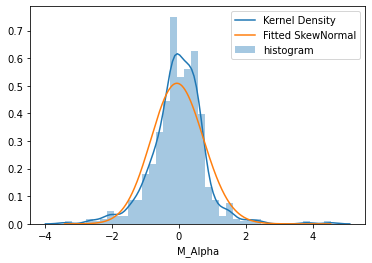

μ = -0.0293
σ = 0.78780
ξ = 0.15040
κ = 4.40350




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


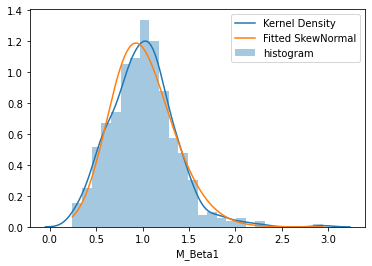

μ = 1.00320
σ = 0.34920
ξ = 0.69778
κ = 2.11706




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


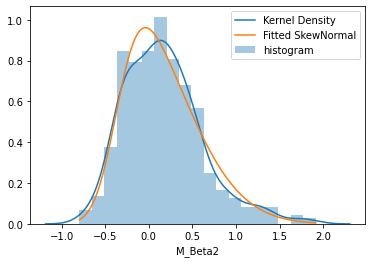

μ = 0.16761
σ = 0.45215
ξ = 0.83701
κ = 1.09437




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


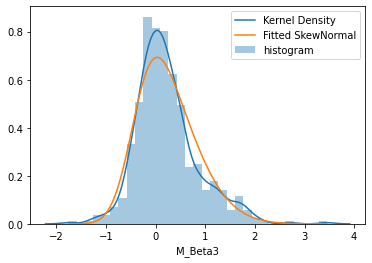

μ = 0.22850
σ = 0.62207
ξ = 0.93315
κ = 2.10761




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


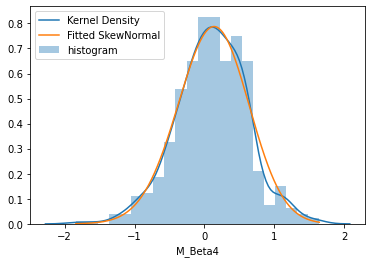

μ = 0.10525
σ = 0.50508
ξ = -0.1580
κ = 0.58431




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


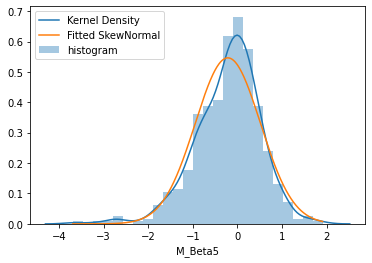

μ = -0.2139
σ = 0.73098
ξ = -0.7360
κ = 1.88379




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


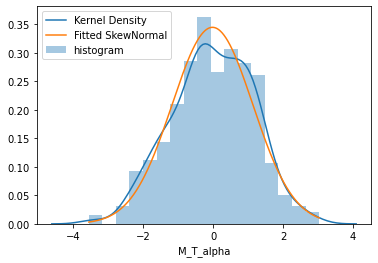

μ = -0.0200
σ = 1.15782
ξ = -0.1701
κ = -0.2581




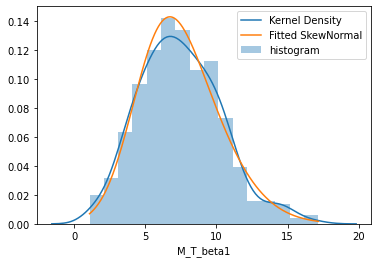

μ = 7.45957
σ = 2.89684
ξ = 0.41405
κ = 0.12576




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


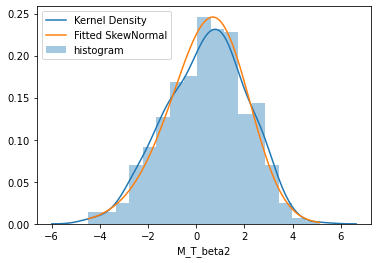

μ = 0.40064
σ = 1.65859
ξ = -0.2302
κ = -0.3016




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


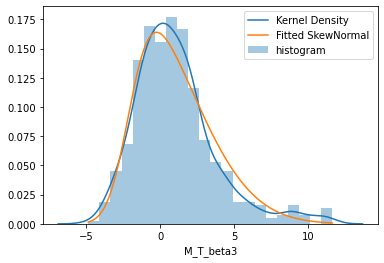

μ = 1.02571
σ = 2.73458
ξ = 1.18778
κ = 2.14450




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


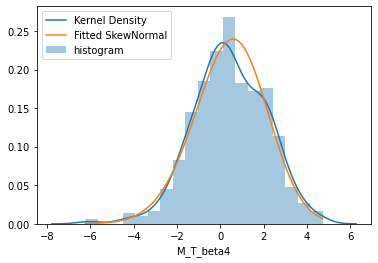

μ = 0.42550
σ = 1.68644
ξ = -0.2436
κ = 0.44259




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


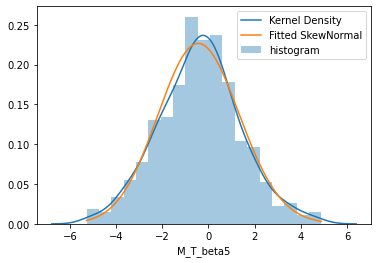

μ = -0.3843
σ = 1.76703
ξ = 0.05767
κ = 0.14697




C:\Users\aleta\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1722: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


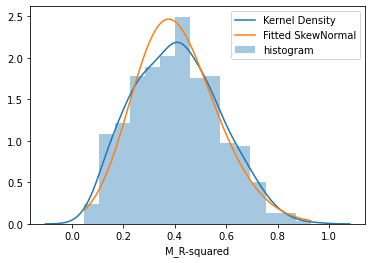

μ = 0.40689
σ = 0.16549
ξ = 0.23591
κ = -0.4524




In [245]:
for i in monthly_OLS.columns[1:14]:
    data = monthly_OLS[i]
    
    mu = str(data.mean())
    sd = str(data.std())
    skew = str(data.skew())
    kurt = str(data.kurt())
    
    params = skewnorm.fit(data, 10, loc=80, scale=40)
    
    ax = sns.distplot(data, kde_kws={'label':'Kernel Density'}, label='histogram')

    # draw the pdf of the fitted skewnorm
    x = np.linspace(data.min(), data.max(), 500)
    ax.plot(x, skewnorm.pdf(x, *params), label='Fitted SkewNormal')
    plt.legend()
    plt.show()
    
    
    print('μ = ' + mu[0:7])
    print('σ = ' + sd[0:7])
    print('ξ = ' + skew[0:7])
    print('κ = ' + kurt[0:7])
    print('\n')
    

Aggregate at GICS level

In [246]:
monthly_OLS['GICS'] = GICS
print(monthly_OLS.groupby(GICS).count())

                        M_Ticker  M_Alpha  M_Beta1  M_Beta2  M_Beta3  M_Beta4  \
Communication Services        27       27       27       27       27       27   
Consumer Discretionary        60       60       60       60       60       60   
Consumer Staples              32       32       32       32       32       32   
Energy                        21       21       21       21       21       21   
Financials                    67       67       67       67       67       67   
Health Care                   64       64       64       64       64       64   
Industrials                   74       74       74       74       74       74   
Information Technology        74       74       74       74       74       74   
Materials                     28       28       28       28       28       28   
Real Estate                   29       29       29       29       29       29   
Utilities                     28       28       28       28       28       28   

                        M_B

In this case the grouping by secotr seems to be more effective

In [248]:
print(monthly_OLS.groupby(GICS).mean().std()[0:6].sum())

2.034556712594832


We do once again the ANOVA test and Boxplots. We still reject the null hypothesis that the sectors all have the same average parameters

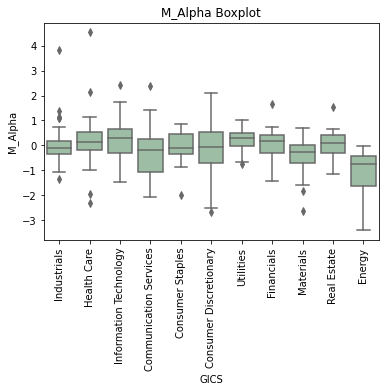

P-value of all having same M_Alpha is 1.674159788404857e-10 
 
 
 



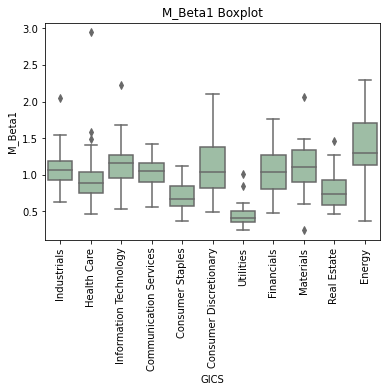

P-value of all having same M_Beta1 is 1.106283096274371e-33 
 
 
 



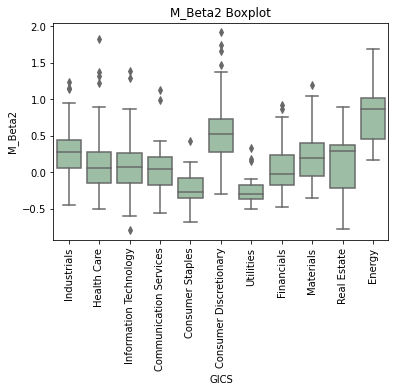

P-value of all having same M_Beta2 is 1.0329832998546953e-31 
 
 
 



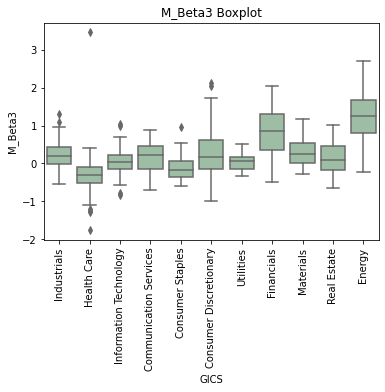

P-value of all having same M_Beta3 is 8.80621384094904e-43 
 
 
 



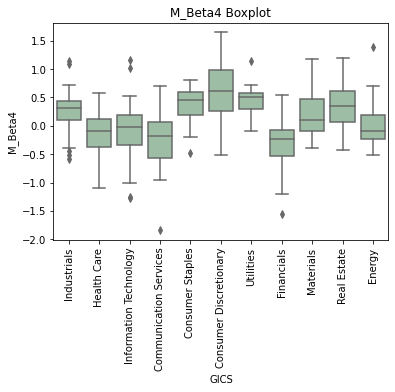

P-value of all having same M_Beta4 is 7.692890139401732e-42 
 
 
 



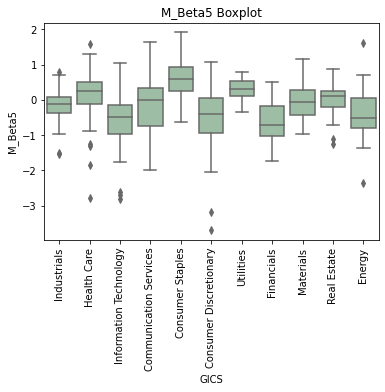

P-value of all having same M_Beta5 is 2.1553409325802267e-23 
 
 
 



In [250]:
sampleCOM = monthly_OLS[monthly_OLS['GICS']=='Communication Services']
sampleCD = monthly_OLS[monthly_OLS['GICS']=='Consumer Discretionary']
sampleCS = monthly_OLS[monthly_OLS['GICS']=='Consumer Staples']
sampleEN = monthly_OLS[monthly_OLS['GICS']=='Energy']
sampleFI = monthly_OLS[monthly_OLS['GICS']=='Financials']
sampleHC = monthly_OLS[monthly_OLS['GICS']=='Health Care']
sampleIN = monthly_OLS[monthly_OLS['GICS']=='Industrials']
sampleIT = monthly_OLS[monthly_OLS['GICS']=='Information Technology']
sampleMA = monthly_OLS[monthly_OLS['GICS']=='Materials']
sampleRE = monthly_OLS[monthly_OLS['GICS']=='Real Estate']
sampleUT = monthly_OLS[monthly_OLS['GICS']=='Utilities']

for i in monthly_OLS.columns[1:7]:
    ax = sns.boxplot(x='GICS', y=i, data=monthly_OLS, color='#99c2a2')
    plt.title(i + ' Boxplot')
    plt.xticks(rotation=90)
    plt.show()
    
    fvalue, pvalue = f_oneway(sampleCOM[i], sampleCD[i], sampleCS[i], sampleEN[i], sampleFI[i], sampleHC[i], sampleIN[i],
                                   sampleIT[i], sampleMA[i], sampleRE[i], sampleUT[i])
    print('P-value of all having same ' + i +' is ' + str(pvalue), '\n', '\n','\n','\n')
  
    

In [258]:
M_pairs = []
M_alpha_p=[]
M_beta1_p=[]
M_beta2_p=[]
M_beta3_p=[]
M_beta4_p=[]
M_beta5_p=[]

res = [(a, b) for idx, a in enumerate(monthly_OLS['GICS'].unique()) for b in monthly_OLS['GICS'].unique()[idx + 1:]]

for i in range(0,len(res)):
    Sector1 = res[i][0]
    Sector2 = res[i][1]
    
    for k in monthly_OLS.columns[1:7]:

        SS1 = monthly_OLS[monthly_OLS['GICS']==Sector1][k]
        SS2 = monthly_OLS[monthly_OLS['GICS']==Sector2][k]

        tvalue, pvalue = stats.ttest_ind(SS1, SS2)
        
        if k == 'M_Alpha':
            M_alpha_p.append(pvalue)
        elif k == 'M_Beta1':
            M_beta1_p.append(pvalue)
        elif k == 'M_Beta2':
            M_beta2_p.append(pvalue)
        elif k == 'M_Beta3':
            M_beta3_p.append(pvalue)
        elif k == 'M_Beta4':
            M_beta4_p.append(pvalue)
        elif k == 'M_Beta5':
            M_beta5_p.append(pvalue)
            
    M_pairs.append(Sector1 + ' VS ' + Sector2)

In [259]:
monthly_P_values = pd.DataFrame()
monthly_P_values['Pair'] = M_pairs
monthly_P_values['Alpha_pv'] = M_alpha_p
monthly_P_values['Beta1_pv'] = M_beta1_p
monthly_P_values['Beta2_pv'] = M_beta2_p
monthly_P_values['Beta3_pv'] = M_beta3_p
monthly_P_values['Beta4_pv'] = M_beta4_p
monthly_P_values['Beta5_pv'] = M_beta5_p

monthly_P_values.head(5)

,Pair,Alpha_pv,Beta1_pv,Beta2_pv,Beta3_pv,Beta4_pv,Beta5_pv
0,Industrials VS Health Care,0.127729,1.275723e-02,8.846115e-02,5.980002e-09,6.716365e-09,2.468821e-03
1,Industrials VS Information Technology,0.066250,4.261419e-02,7.921177e-03,7.475045e-04,6.426221e-07,1.079805e-05
2,Industrials VS Communication Services,0.156687,5.891537e-01,1.488821e-02,2.264500e-01,4.995931e-07,9.489813e-01
3,Industrials VS Consumer Staples,0.849926,9.154578e-12,7.144401e-11,3.187960e-05,6.490480e-02,3.827627e-10
4,Industrials VS Consumer Discretionary,0.368931,3.903725e-01,3.934953e-05,6.241642e-01,2.324067e-06,3.731650e-03


In general less parameter values diverge across sectors at the 5% significance level

In [260]:
for i in monthly_P_values.columns[1:]:
    data = monthly_P_values[monthly_P_values[i] < 0.05]
    print('Pairs showing statistically different ' + i[0:-3] + ' are ' + str(data.count()[0]) + ' over 55')
    
acc = (monthly_P_values[['Alpha_pv', 'Beta1_pv', 'Beta2_pv', 'Beta3_pv', 'Beta4_pv', 'Beta5_pv']]<0.05).sum().sum()/(len(monthly_P_values)*6)
print('\n''Percentage number of siginificantly different average parameters is ' + str(acc))

Pairs showing statistically different Alpha are 24 over 55
Pairs showing statistically different Beta1 are 40 over 55
Pairs showing statistically different Beta2 are 37 over 55
Pairs showing statistically different Beta3 are 37 over 55
Pairs showing statistically different Beta4 are 38 over 55
Pairs showing statistically different Beta5 are 34 over 55

Percentage number of siginificantly different average parameters is 0.6363636363636364


Clustering

Here the WCSS line is smoother so that is difficult to chose a proper value, we take 5 as for consistency with daily data

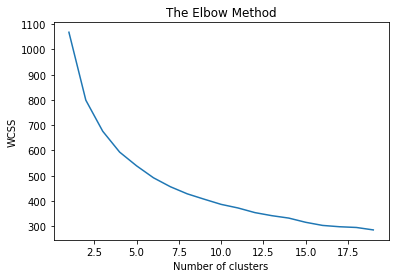

In [261]:
X = monthly_OLS[['M_Alpha','M_Beta1','M_Beta2','M_Beta3','M_Beta4','M_Beta5']]

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 420)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [262]:
km = KMeans(n_clusters=5)
km.fit(X)
km.predict(X)
labels = km.labels_

monthly_OLS['K-Mean']=labels
monthly_OLS

,M_Ticker,M_Alpha,M_Beta1,M_Beta2,M_Beta3,M_Beta4,M_Beta5,M_T_alpha,M_T_beta1,M_T_beta2,M_T_beta3,M_T_beta4,M_T_beta5,M_R-squared,GICS,K-Mean
0,MMM,-0.612578,0.955179,0.235393,-0.037109,0.436850,0.171669,-1.958181,11.965502,1.640237,-0.285479,2.476290,0.762108,0.589007,Industrials,0
1,AOS,0.083946,1.168326,0.439652,-0.250492,0.636196,-0.008290,0.175408,9.566880,2.002545,-1.259635,2.357333,-0.024057,0.485948,Industrials,3
2,ABT,-0.042296,0.948002,-0.304727,-0.561431,0.061892,0.589599,-0.120752,10.606310,-1.896410,-3.857416,0.313337,2.337706,0.466230,Health Care,3
3,ABBV,0.140893,1.038493,0.032582,-0.044834,0.077668,0.312338,0.209903,5.721100,0.106920,-0.169164,0.199719,0.664306,0.290391,Health Care,3
4,ABMD,0.801133,1.092837,1.367088,-1.211946,0.115979,0.158395,0.762748,4.077426,2.837224,-2.776891,0.195809,0.209436,0.230958,Health Care,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,YUM,0.036428,0.852792,0.196170,0.114798,0.983660,-0.317403,0.079711,7.312669,0.935691,0.604523,3.816815,-0.964545,0.390885,Consumer Discretionary,0
500,ZBRA,0.445269,1.263296,0.783726,0.121275,0.277392,-1.221449,0.727500,8.088531,2.791228,0.476850,0.803678,-2.771521,0.481886,Information Technology,2
501,ZBH,-0.709372,1.078571,0.045863,0.100296,-0.434059,0.073959,-1.469274,8.754509,0.207069,0.499931,-1.594247,0.212743,0.432293,Health Care,0
502,ZION,0.269604,1.152586,0.682210,1.640066,-0.816939,-1.029545,0.533529,8.938399,2.942868,7.810745,-2.866812,-2.829503,0.690921,Financials,1


From this naive measure the cluster algorithm seems to perform better in the monthly frame, as distance is increased

In [263]:
(monthly_OLS.groupby('K-Mean').mean().std()[0:6]-monthly_OLS.groupby('GICS').mean().std()[0:6]).sum()

1.2612602309505438

Alphas

Of course at the monthly level the magnitude of alpha will be higher than at daily level. We can see that the best two performers were once agian Moderna and Carrier, followed by Solar Edge, Netflix and DexCom. Worst Alphas instead are attributed to Apa Corporation, Under Armor, Freereport, Norwegian cruise, Organon and co, thus dispalying 3 out of 5 low alphas as in the daily frame

In [265]:
M_top5_alphas=monthly_OLS.nlargest(5,columns='M_Alpha')
M_bottom5_alphas=monthly_OLS.nsmallest(5,columns='M_Alpha')

print(M_top5_alphas)
print(M_bottom5_alphas)

    M_Ticker   M_Alpha   M_Beta1   M_Beta2   M_Beta3   M_Beta4   M_Beta5  \
318     MRNA  4.532143  1.165844  1.828538 -1.757344 -0.958901  0.142417   
89      CARR  3.827331  0.718424  0.483452 -0.532581  0.354474 -0.233227   
421     SEDG  2.437744  0.532111  0.618735  0.372481 -0.117943 -2.602011   
331     NFLX  2.393735  0.856587 -0.087860  0.106470 -1.840572 -1.990962   
145     DXCM  2.128312  0.516389  0.711521 -1.048901 -0.835668 -1.299561   

     M_T_alpha  M_T_beta1  M_T_beta2  M_T_beta3  M_T_beta4  M_T_beta5  \
318   0.990090   1.141591   0.841382  -1.169372  -0.415350   0.057268   
89    1.289591   1.341395   0.460850  -0.707548   0.338157  -0.198349   
421   1.450553   1.201310   0.823853   0.602644  -0.124358  -2.365008   
331   1.868400   2.620110  -0.149488   0.199995  -2.547559  -2.158188   
145   2.089350   1.986585   1.522596  -2.478046  -1.454746  -1.771760   

     M_R-squared                    GICS  K-Mean  
318     0.154600             Health Care       2  
89

FACTORS RESEARCH

The first factor we want to explore is the ESG factor. As there exist already many weighted portfolios following ESG scores, we download the monthly returns for Xtrackers S&P 500 ESG ETF and perform the regression for each stock over the ESG portfolio and the other Fama-French Portfolios, storing the values of Beta6 and its t_value for each regression

We start on 26/06/2019 since the ETF was traded for the first time on that date


In [286]:
start = dt.datetime(2019,6,26)
end = dt.datetime(2021,12,31)

#fetch data for ESG ETF
ESG_factor = web.get_data_yahoo('SNPE',start, end, interval='m')
ESG_factor = (np.log(ESG_factor['Adj Close']) - np.log(ESG_factor['Adj Close'].shift(1)))*100
ESG_factor=ESG_factor.fillna(0)

We aggregate the Fama-French dataset at monthly level and extract only the dates of our interest

In [287]:
monthlyFF = famafrench[famafrench['Date']>20190631]
monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]
mff = monthlyFF.groupby('month').sum()
mff['ESG']=np.array(ESG_factor)
mff

<ipython-input-287-5fa8e5fdb959>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,ESG
month,,,,,,,,
201907,444195756,1.25,-1.71,0.44,-0.10,0.31,0.198,0.000000
201908,444197953,-2.36,-3.31,-5.13,0.53,-1.00,0.154,-1.516750
201909,403818318,1.44,0.29,6.77,1.90,3.03,0.180,1.236283
201910,464393368,2.12,0.28,-1.85,0.46,-0.97,0.161,2.973079
201911,403822303,3.82,0.41,-1.95,-1.46,-1.40,0.120,3.715222
201912,424015526,2.75,0.92,1.75,0.03,1.21,0.147,2.505116
202001,424202455,-0.04,-4.42,-6.40,-1.22,-2.34,0.126,1.198423
202002,383804093,-8.23,0.04,-4.14,-1.49,-2.80,0.114,-9.759815
202003,444406951,-10.68,-9.38,-15.47,-2.71,0.60,0.132,-12.092805


We perform the regression

In [293]:
start = dt.datetime(2019,7,1)
end = dt.datetime(2021,12,31)

ESG_beta=[]
ESG_tvalue=[]
ESG_r_sqrd=[]

for i in modified_tickers:
    try:
        df = web.get_data_yahoo(i,start, end, interval='m')
    except:
        excluded.append(i)
        print('EXCLUDING:' + str(i))
        continue
        
    df['log_ret'] = (np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1)))*100
    df['log_ret']=df['log_ret'].fillna(0)
    ss = len(np.array(df['log_ret']))
    df['log_ret']=np.array(df['log_ret'])-np.array(mff['RF'][-ss:])

    X = mff[['Mkt-RF', 'SMB','HML','RMW', 'CMA', 'ESG' ]][-ss:]
    X = sm.add_constant(X)

    y = np.array(df['log_ret'])

    est = sm.OLS(y, X).fit()

    ESG_beta.append(est.params[6])
    ESG_tvalue.append(est.tvalues[6])

    ESG_r_sqrd.append(est.rsquared)

    print(i)

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVI
ADM
ADBE
ADP
AAP
AES
AFL
A
AIG
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
APA
AAPL
AMAT
APTV
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
BKR
BLL
BAC
BBWI
BAX
BDX
BRK-B
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF-B
CHRW
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CERN
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ENPH
ETR
EOG
EPAM
EFX
EQIX
EQR
ESS
EL
ETSY
RE
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FAST
FRT
FDX
FITB
FRC
FE
FIS
FISV
FLT
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GRMN
IT
GE
GNRC
GD
GIS
GPC
GILD
GL
GPN
GM
GS
GWW
HAL
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HWM
HPQ
HU

As the t-value is extremely small we fail to reject H0, so that ESG Beta may be equal to 0, thus not relevant in the regression

In [299]:
ESG = pd.DataFrame()

ESG['ESGBeta']=ESG_beta
ESG['ESG_Tvalue']=ESG_tvalue

ESG.describe()

,ESGBeta,ESG_Tvalue
count,504.000000,504.000000
mean,0.386050,0.219644
std,1.917581,1.088371
min,-9.814956,-3.359985
25%,-0.805044,-0.504655
50%,0.453359,0.259865
75%,1.480233,0.932957
max,8.762483,3.578351


The Second factor studied is the Momentum. As in the ESG case there are a lot of instruments tracking Momentum in the S&P500 and we have selected the iShares MSCI USA Momentum Factor ETF, which has been quoted from 18/04/2013

In [300]:
start = dt.datetime(2013,4,18)
end = dt.datetime(2021,12,31)

Momentum = web.get_data_yahoo('MTUM',start, end, interval='m')
Momentum = (np.log(Momentum['Adj Close']) - np.log(Momentum['Adj Close'].shift(1)))*100
Momentum=Momentum.fillna(0)

monthlyFF = famafrench[famafrench['Date']>20130417]
monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]
mff = monthlyFF.groupby('month').sum()
mff['Momentum']=np.array(Momentum)
mff

<ipython-input-300-48b4b53c0126>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]


,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,Momentum
month,,,,,,,,
201304,181173816,3.13,1.37,1.26,0.25,-0.57,0.0,0.000000
201305,442871349,2.84,2.04,2.63,-2.08,-0.77,0.0,0.308181
201306,402612310,-1.10,1.57,0.10,-0.42,0.12,0.0,-1.218933
201307,442875756,5.49,1.71,0.54,-1.33,0.51,0.0,6.191366
201308,442877953,-2.68,-0.02,-2.75,0.65,-2.10,0.0,-3.628632
...,...,...,...,...,...,...,...,...
202108,444637951,2.91,-0.62,-0.04,-0.29,-1.51,0.0,4.036715
202109,424429239,-4.39,1.34,5.22,-2.01,2.17,0.0,-3.711581
202110,424431331,6.51,-2.51,-0.44,1.69,-1.22,0.0,8.238788


In [301]:
start = dt.datetime(2013,4,18)
end = dt.datetime(2021,12,31)

Momentum_beta=[]
Momentum_tvalue=[]
Momentum_r_sqrd=[]

for i in modified_tickers:
    try:
        df = web.get_data_yahoo(i,start, end, interval='m')
    except:
        excluded.append(i)
        print('EXCLUDING:' + str(i))
        continue
        
    df['log_ret'] = (np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1)))*100
    df['log_ret']=df['log_ret'].fillna(0)
    ss = len(np.array(df['log_ret']))
    df['log_ret']=np.array(df['log_ret'])-np.array(mff['RF'][-ss:])

    X = mff[['Mkt-RF', 'SMB','HML','RMW', 'CMA', 'Momentum' ]][-ss:]
    X = sm.add_constant(X)

    y = np.array(df['log_ret'])

    est = sm.OLS(y, X).fit()

    Momentum_beta.append(est.params[6])
    Momentum_tvalue.append(est.tvalues[6])

    Momentum_r_sqrd.append(est.rsquared)

    print(i)

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVI
ADM
ADBE
ADP
AAP
AES
AFL
A
AIG
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
APA
AAPL
AMAT
APTV
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
BKR
BLL
BAC
BBWI
BAX
BDX
BRK-B
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF-B
CHRW
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CERN
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ENPH
ETR
EOG
EPAM
EFX
EQIX
EQR
ESS
EL
ETSY
RE
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FAST
FRT
FDX
FITB
FRC
FE
FIS
FISV
FLT
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GRMN
IT
GE
GNRC
GD
GIS
GPC
GILD
GL
GPN
GM
GS
GWW
HAL
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HWM
HPQ
HU

Also in this case the t-value is really small, being 0.494 so that the Momentum portfolio doesn't seem to be statistically relevant in the regression

In [302]:
Momentum_df = pd.DataFrame()

Momentum_df['Momentum_Beta']=Momentum_beta
Momentum_df['Momentum_tvalue']=Momentum_tvalue

Momentum_df.describe()

,Momentum_Beta,Momentum_tvalue
count,504.000000,504.000000
mean,0.196895,0.494095
std,0.756713,1.455244
min,-8.642341,-3.253148
25%,-0.166156,-0.479217
50%,0.166890,0.457392
75%,0.517796,1.446826
max,3.364854,4.658702


Another factor we want to test is the US Dollar Strenght over the years, and to do so we use the instrument US Dollar/USDX - Index - Cash 

In [304]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2021,12,31)

USD = web.get_data_yahoo('DX-Y.NYB',start, end, interval='m')
USD = (np.log(USD['Adj Close']) - np.log(USD['Adj Close'].shift(1)))*100
USD=USD.fillna(0)

monthlyFF = famafrench
monthlyFF['month'] = famafrench['Date'].astype(str).str[:6]
mff = monthlyFF.groupby('month').sum()
mff['USD']=np.array(USD)
mff

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,USD
month,,,,,,,,
201001,381902212,-3.34,0.43,0.53,-1.19,0.61,0.000,0.000000
201002,381904055,3.48,1.46,3.20,-0.27,1.36,0.000,1.126281
201003,462307260,6.13,1.78,2.13,-0.64,1.65,0.000,0.879643
201004,422108751,2.08,4.83,2.89,0.60,1.74,0.021,0.981968
201005,402010310,-7.80,0.30,-2.30,1.19,-0.06,0.020,5.605164
...,...,...,...,...,...,...,...,...
202108,444637951,2.91,-0.62,-0.04,-0.29,-1.51,0.000,0.497836
202109,424429239,-4.39,1.34,5.22,-2.01,2.17,0.000,1.733779
202110,424431331,6.51,-2.51,-0.44,1.69,-1.22,0.000,-0.138023


In [305]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2021,12,31)

USD_beta=[]
USD_tvalue=[]
USD_r_sqrd=[]

for i in modified_tickers:
    try:
        df = web.get_data_yahoo(i,start, end, interval='m')
    except:
        excluded.append(i)
        print('EXCLUDING:' + str(i))
        continue
        
    df['log_ret'] = (np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1)))*100
    df['log_ret']=df['log_ret'].fillna(0)
    ss = len(np.array(df['log_ret']))
    df['log_ret']=np.array(df['log_ret'])-np.array(mff['RF'][-ss:])

    X = mff[['Mkt-RF', 'SMB','HML','RMW', 'CMA', 'USD' ]][-ss:]
    X = sm.add_constant(X)

    y = np.array(df['log_ret'])

    est = sm.OLS(y, X).fit()

    USD_beta.append(est.params[6])
    USD_tvalue.append(est.tvalues[6])

    USD_r_sqrd.append(est.rsquared)

    print(i)

MMM
AOS
ABT
ABBV
ABMD
ACN
ATVI
ADM
ADBE
ADP
AAP
AES
AFL
A
AIG
APD
AKAM
ALK
ALB
ARE
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AMD
AEE
AAL
AEP
AXP
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
APA
AAPL
AMAT
APTV
ANET
AJG
AIZ
T
ATO
ADSK
AZO
AVB
AVY
BKR
BLL
BAC
BBWI
BAX
BDX
BRK-B
BBY
BIO
TECH
BIIB
BLK
BK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BRO
BF-B
CHRW
CDNS
CZR
CPB
COF
CAH
KMX
CCL
CARR
CTLT
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CDAY
CERN
CF
CRL
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
CTRA
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ENPH
ETR
EOG
EPAM
EFX
EQIX
EQR
ESS
EL
ETSY
RE
EVRG
ES
EXC
EXPE
EXPD
EXR
XOM
FFIV
FDS
FAST
FRT
FDX
FITB
FRC
FE
FIS
FISV
FLT
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GRMN
IT
GE
GNRC
GD
GIS
GPC
GILD
GL
GPN
GM
GS
GWW
HAL
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HOLX
HD
HON
HRL
HST
HWM
HPQ
HU

Also the USD strenght is not statistically significant

In [306]:
USD_df = pd.DataFrame()

USD_df['USD_Beta']=USD_beta
USD_df['USD_tvalue']=USD_tvalue

USD_df.describe()

,USD_Beta,USD_tvalue
count,504.000000,504.000000
mean,-0.020005,-0.031673
std,0.393440,1.245282
min,-2.661290,-5.074724
25%,-0.189446,-0.652422
50%,0.014442,0.054003
75%,0.190632,0.733882
max,1.341222,3.415781
